<a href="https://colab.research.google.com/github/sumaiya008/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/blob/main/notebooks/1_0_Subdividing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#installing necessary library
import cv2
import os
from google.colab.patches import cv2_imshow

In [4]:
# Use gdown to download the image from Google Drive
!pip install gdown
import gdown

In [5]:
# Define the directory where the patches will be saved on Google Drive
output_dir = '/content/drive/My Drive/TagLab/Patches/'
os.makedirs(output_dir, exist_ok=True)


In [ ]:
!wget "https://drive.google.com/file/d/1QkewXZb6S4fxavi-h1xnHU929OZ5es8V/view?usp=drive_link"

--2023-09-12 03:43:47--  https://drive.google.com/file/d/1QkewXZb6S4fxavi-h1xnHU929OZ5es8V/view?usp=drive_link
Resolving drive.google.com (drive.google.com)... 74.125.143.102, 74.125.143.101, 74.125.143.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=drive_link’

view?usp=drive_link     [ <=>                ]  77.93K  --.-KB/s    in 0.01s   

2023-09-12 03:43:47 (6.79 MB/s) - ‘view?usp=drive_link’ saved [79799]



In [3]:
# # Load the input image
# input_image = cv2.imread('RPN_2015_ANA_0424.png',1)

# # Check if the image loaded successfully
# if input_image is None:
#     raise FileNotFoundError(f"Image not found at {input_image_path}")


In [6]:
# Define the file ID of the image you want to download from Google Drive
file_id = "1QkewXZb6S4fxavi-h1xnHU929OZ5es8V"

# Define the destination path where you want to save the downloaded image
destination_path = '/content/input_image.jpg'


In [7]:
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1QkewXZb6S4fxavi-h1xnHU929OZ5es8V
To: /content/input_image.jpg
100%|██████████| 468M/468M [00:05<00:00, 85.5MB/s]


'/content/input_image.jpg'

In [8]:
# Load the input image
input_image = cv2.imread(destination_path)

# Check if the image loaded successfully
if input_image is None:
    raise FileNotFoundError(f"Image not found at {destination_path}")

# Display the loaded image
cv2_imshow(input_image)

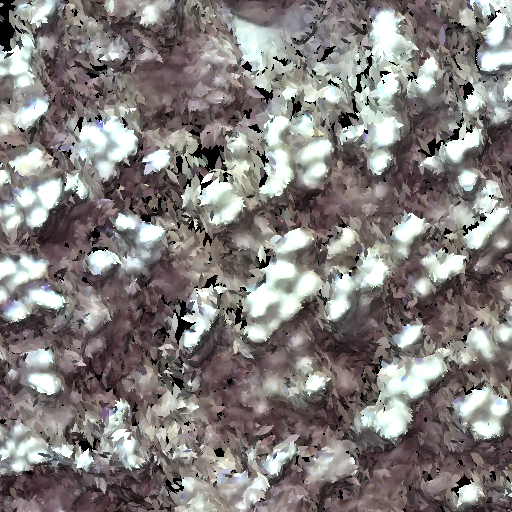

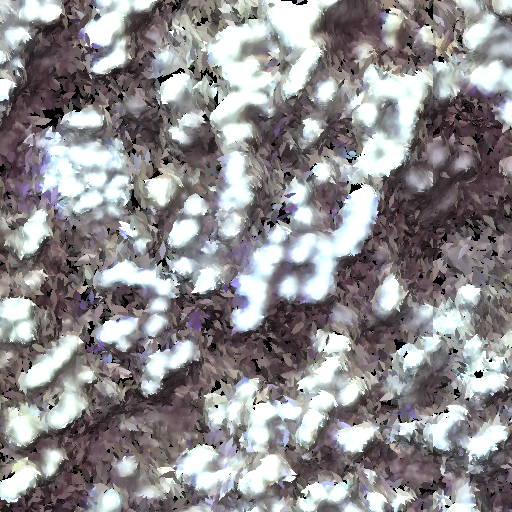

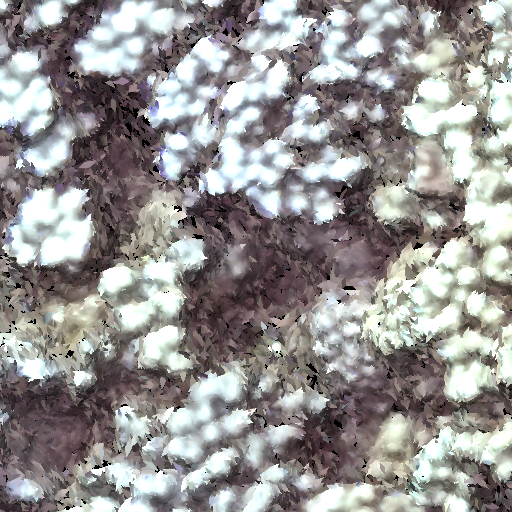

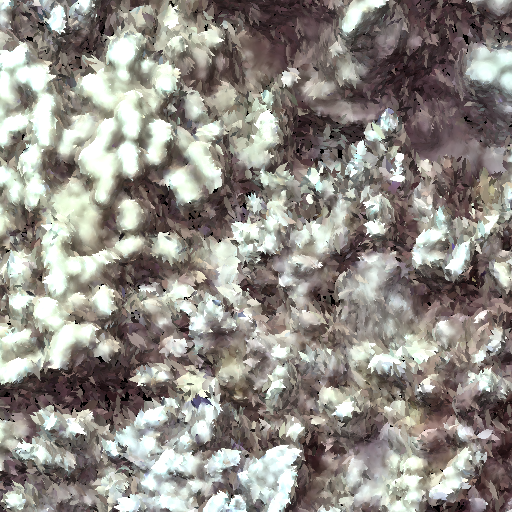

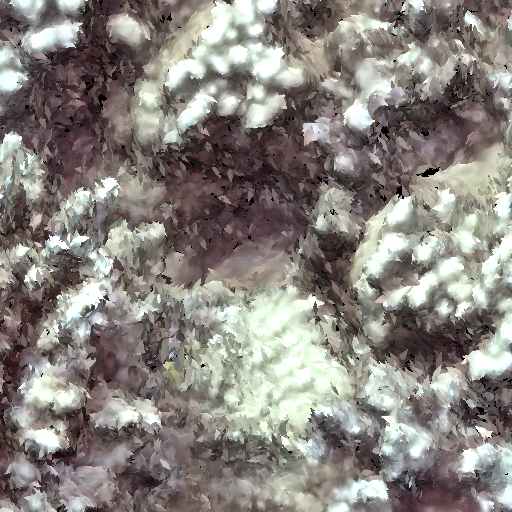

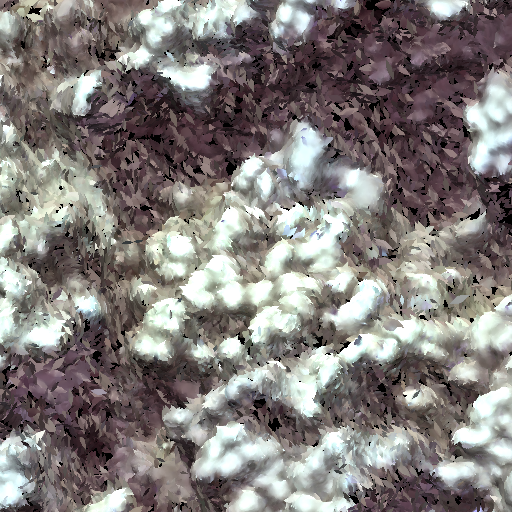

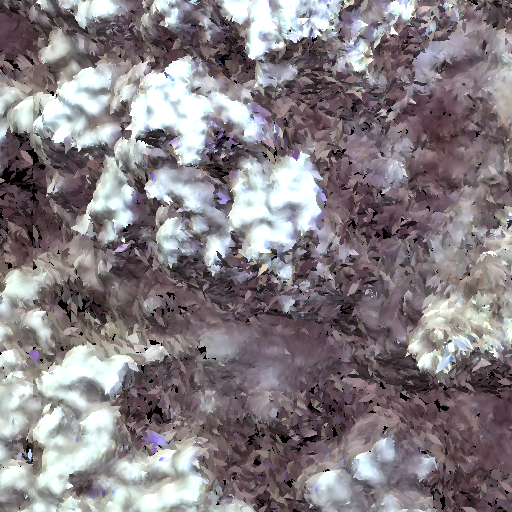

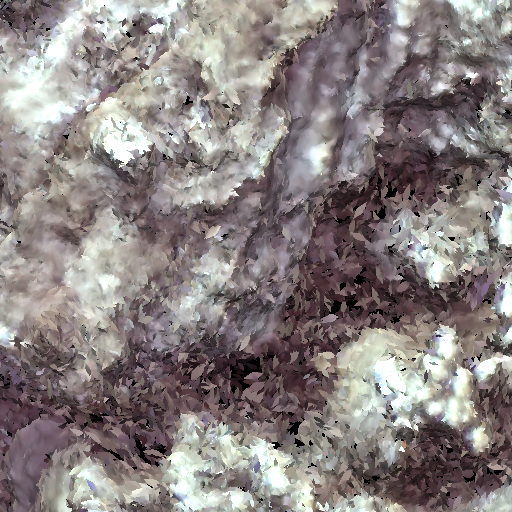

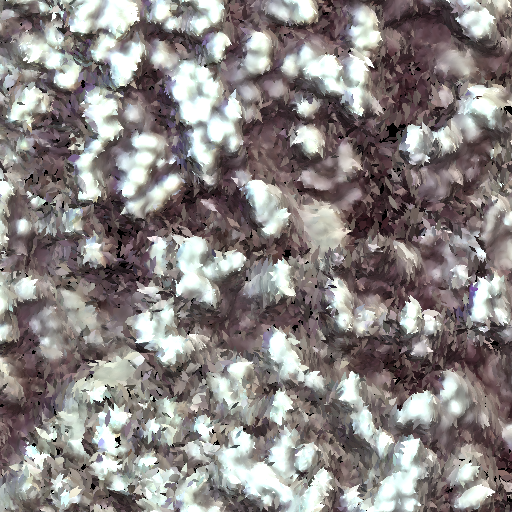

In [12]:
# Define the size of each patch (1m x 1m)
patch_width = 512  # 1 meter in pixels (adjust based on your image resolution)
patch_height = 512  # 1 meter in pixels (adjust based on your image resolution)

# Limit the number of patches to display
max_display_patches = 9

# Counter for displayed patches
displayed_count = 0

# Iterate through the image and extract patches
for y in range(0, input_image.shape[0], patch_height):
    for x in range(0, input_image.shape[1], patch_width):
        if displayed_count < max_display_patches:
            patch = input_image[y:y+patch_height, x:x+patch_width]

            # Save each patch with a unique name
            patch_name = f'patch_{y}_{x}.jpg'
            patch_path = os.path.join(output_dir, patch_name)
            cv2.imwrite(patch_path, patch)

            # Display the extracted patch in Colab
            cv2_imshow(patch)

            displayed_count += 1
